In [1]:
# General import
import numpy as np
import os
from PIL import Image
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataLoader, Blurr, Add_noise
from Codes.alternate import AlternatingBD
from Codes.posttreat import Display
from Codes.posttreat import Error_Display

# Minimisation alternée

Approche variationnelle pour la reconstruction d'un noyau régulier $K$, minimisation de l'énergie,
$$
E_1(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2
\; .
$$ 
On peut considérer que le noyau appartien a l'ensemble des simplexe (ensemble des noyaux à coefficient positif dont la somme vaut 1).
On sonsidere alors l'énergie
$$
E_1'(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2 + \Sigma(K)
\; .
$$ 


Approche variationnelle pour la reconstruction de l'image $u$, avec régularisation TV,
$$
E_2(u) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \mu \text{TV} (u)
\; .
$$

Dans la minimisation alternée, on considere d'abord la minimisation de $E_2$ 
pour reconstruire l'image $u$, puis de $E_1$ (ou éventuellement $E_1'$) pour reconstruire le noyau $K$.

In [2]:
file_name = 'Images'
im_name   = 'image01.png'
x_i = DataLoader(file_name,im_name)
x_i = x_i/np.amax(x_i)# Rescaling

In [3]:
M         = 20
Nx, Ny    = np.meshgrid(np.linspace(-1,1,2*M), np.linspace(-1,1,2*M))
d         = np.sqrt(Nx*Nx+Ny*Ny)
sigma,moy = 0.1, 0.0
K         = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K         = K/K.sum() # Simplex

In [4]:
x_b  = Blurr(x_i,K)
x_o1 = Add_noise(x_b)

### Initialisation juste - bruit 1%

Image estimation # 0


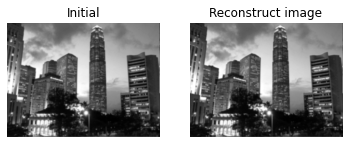

Erreur |x_pred - x_true|_2 : 0.03112007277673028
Kernel estimation # 0


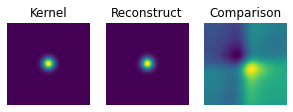

Erreur |K_pred - K_true|_2 : 0.0007409249882615593
Image estimation # 1


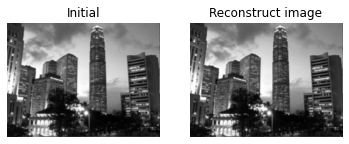

Erreur |x_pred - x_true|_2 : 0.021829911038944206
Kernel estimation # 1


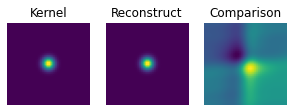

Erreur |K_pred - K_true|_2 : 0.0004749966349920274
Image estimation # 2


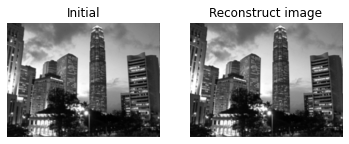

Erreur |x_pred - x_true|_2 : 0.01585716728975974
Kernel estimation # 2


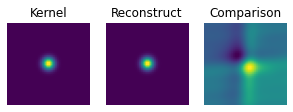

Erreur |K_pred - K_true|_2 : 0.00031363767003078077
Image estimation # 3


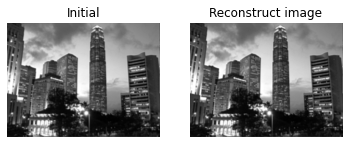

Erreur |x_pred - x_true|_2 : 0.011955580898807824
Kernel estimation # 3


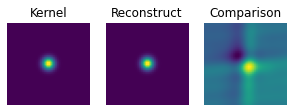

Erreur |K_pred - K_true|_2 : 0.00021513238976874274
Image estimation # 4


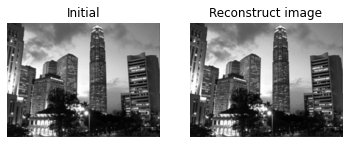

Erreur |x_pred - x_true|_2 : 0.009336551824138381
Kernel estimation # 4


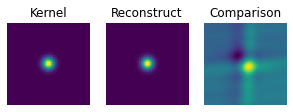

Erreur |K_pred - K_true|_2 : 0.0001547165102537873


In [5]:
alpha = 0.1
mu    = 0.05
K_in   = K.copy()
x_in  = x_o1
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=False)

Text(0.5, 1.0, 'Initialisation juste, bruit 0.01')

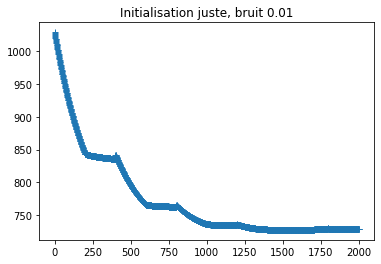

In [6]:
plt.plot(Etot,'+')
plt.title("Initialisation juste, bruit 0.01")

### Initialisation proche - pas de bruit

Image estimation # 0


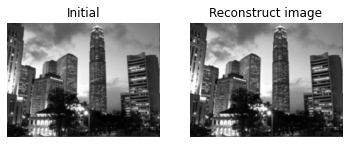

Erreur |x_pred - x_true|_2 : 0.02709028658941453
Kernel estimation # 0


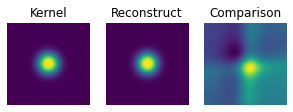

Erreur |K_pred - K_true|_2 : 0.001518905486233152
Image estimation # 1


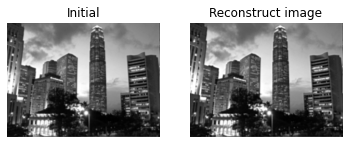

Erreur |x_pred - x_true|_2 : 0.020302995370995437
Kernel estimation # 1


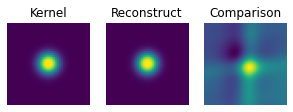

Erreur |K_pred - K_true|_2 : 0.0011403916039162188
Image estimation # 2


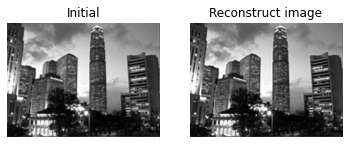

Erreur |x_pred - x_true|_2 : 0.015921193274267345
Kernel estimation # 2


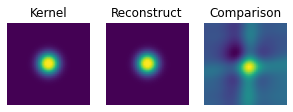

Erreur |K_pred - K_true|_2 : 0.0009145412987984406
Image estimation # 3


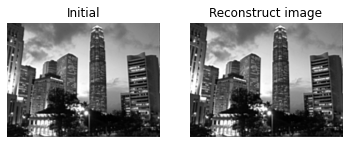

Erreur |x_pred - x_true|_2 : 0.012954926225243489
Kernel estimation # 3


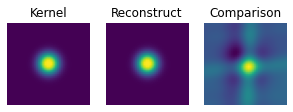

Erreur |K_pred - K_true|_2 : 0.0007773488163747676
Image estimation # 4


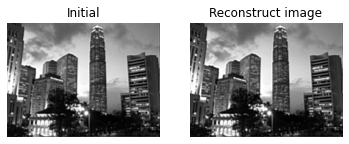

Erreur |x_pred - x_true|_2 : 0.010887040040051749
Kernel estimation # 4


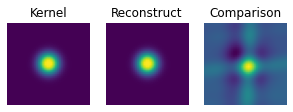

Erreur |K_pred - K_true|_2 : 0.0006909727716485479


In [7]:
alpha     = 0.05
mu        = 0.005
sigma,moy = 0.15, 0.05
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_b,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=False)

Text(0.5, 1.0, 'Initialisation proche, pas de bruit')

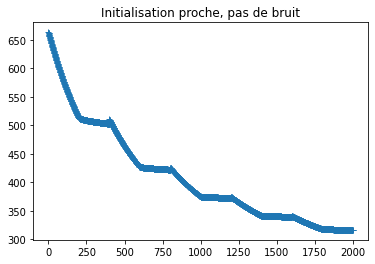

In [8]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, pas de bruit")

### Initialisation proche - bruit 1%

Image estimation # 0


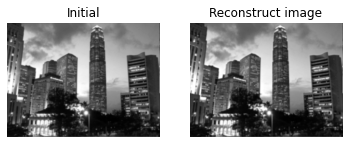

Erreur |x_pred - x_true|_2 : 0.0270902832066955
Kernel estimation # 0


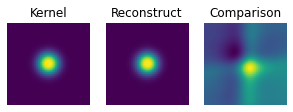

Erreur |K_pred - K_true|_2 : 0.0015189052109280067
Image estimation # 1


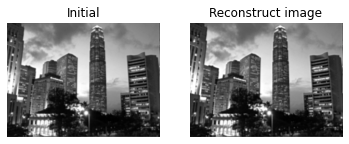

Erreur |x_pred - x_true|_2 : 0.020302993765737746
Kernel estimation # 1


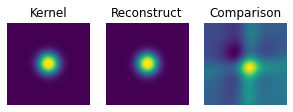

Erreur |K_pred - K_true|_2 : 0.0011403915194373032
Image estimation # 2


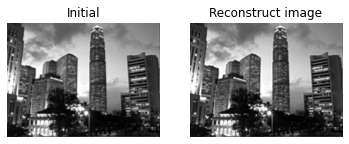

Erreur |x_pred - x_true|_2 : 0.01592119252032599
Kernel estimation # 2


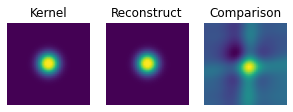

Erreur |K_pred - K_true|_2 : 0.000914541294939606
Image estimation # 3


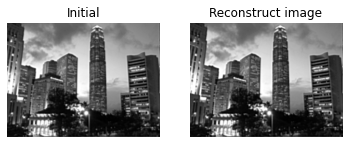

Erreur |x_pred - x_true|_2 : 0.01295492545356817
Kernel estimation # 3


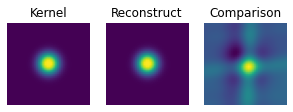

Erreur |K_pred - K_true|_2 : 0.000777348833177234
Image estimation # 4


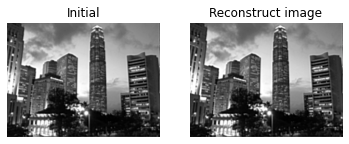

Erreur |x_pred - x_true|_2 : 0.010887039344192209
Kernel estimation # 4


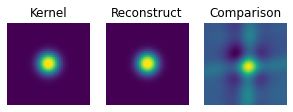

Erreur |K_pred - K_true|_2 : 0.000690972786093614


In [9]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.15, 0.05
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=False)

Text(0.5, 1.0, 'Initialisation proche, bruit 0.01')

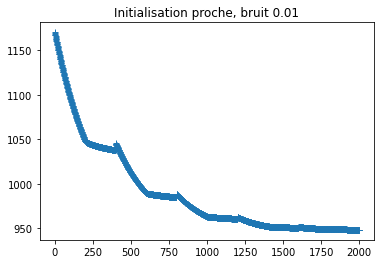

In [10]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01")

### Initialisation proche - bruit 1% - projection sur le simplex

Image estimation # 0


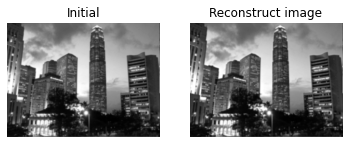

Erreur |x_pred - x_true|_2 : 0.0270902832066955
Kernel estimation # 0


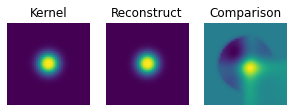

Erreur |K_pred - K_true|_2 : 0.0012920749259913201
Image estimation # 1


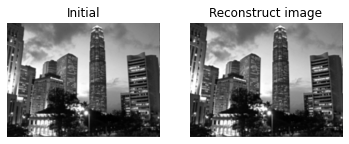

Erreur |x_pred - x_true|_2 : 0.02034501302113971
Kernel estimation # 1


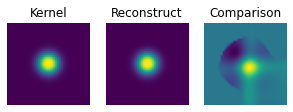

Erreur |K_pred - K_true|_2 : 0.000985090325551231
Image estimation # 2


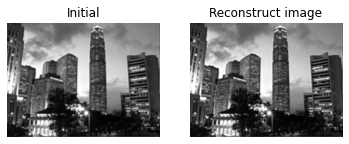

Erreur |x_pred - x_true|_2 : 0.01596367181032845
Kernel estimation # 2


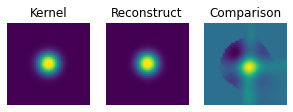

Erreur |K_pred - K_true|_2 : 0.0008169981525942318
Image estimation # 3


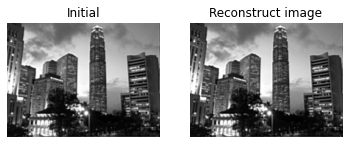

Erreur |x_pred - x_true|_2 : 0.012983617979215892
Kernel estimation # 3


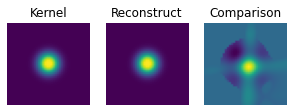

Erreur |K_pred - K_true|_2 : 0.0007116158693469991
Image estimation # 4


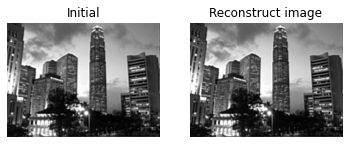

Erreur |x_pred - x_true|_2 : 0.010901646670533373
Kernel estimation # 4


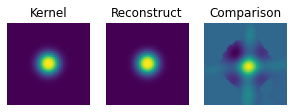

Erreur |K_pred - K_true|_2 : 0.0006413676259959691


In [11]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.15, 0.05
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=True)

Text(0.5, 1.0, 'Initialisation proche, bruit 0.01, proj sur simplex')

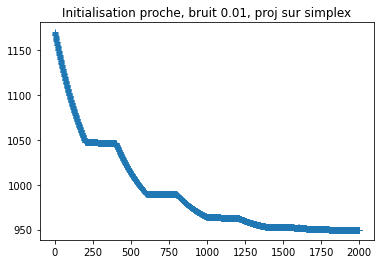

In [12]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01, proj sur simplex")